In [1]:
!pip install -r requirements.txt

     |████████████████████████████████| 9.8 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 454 kB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 100 kB 14.3 MB/s ta 0:00:01
     |████████████████████████████████| 303 kB 13.7 MB/s eta 0:00:01


     |████████████████████████████████| 1.4 MB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 15.0 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 13.4 MB/s eta 0:00:01     |███████████████████████▊        | 7.1 MB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 91 kB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 723 kB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 883 kB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 13.9 MB/s eta 0:00:01     |█████████████████████████████▍  | 23.8 MB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 14.3 MB/s eta 0:00:01
     |██████████████████████████████

     |████████████████████████████████| 1.1 MB 14.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 13.2 MB/s eta 0:00:01
     |████████████████████████████████| 804.1 MB 13.9 MB/s eta 0:00:01     |███████▋                        | 191.9 MB 12.4 MB/s eta 0:00:50     |████████████████████▉           | 523.3 MB 14.0 MB/s eta 0:00:21     |███████████████████████████▉    | 698.2 MB 14.0 MB/s eta 0:00:08     |█████████████████████████████▎  | 736.5 MB 11.7 MB/s eta 0:00:06     |███████████████████████████████▎| 786.5 MB 11.8 MB/s eta 0:00:02
     |████████████████████████████████| 74 kB 16.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 13.5 MB/s eta 0:00:01
  Created wheel for contextvars: filename=contextvars-2.4-py3-none-any.whl size=7665 sha256=7b17eab9d2c93a7de8ff63bca9c55f63da1c6bad3f65fe65bd682108e895b4b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-otx8qfew/wheels/41/11/53/911724983aa48deb94792432e14e518447212dd6c5477d49d3
  Created wheel for g

In [1]:
import tensorflow as tf
print(tf.__version__)

import os
from os import listdir
from transformers import ( 
    T5Tokenizer, 
    TFT5ForConditionalGeneration
)
import numpy as np
import time

import pickle

# import python files
import sys
sys.path.append("../..")

from python_files.evaluation.mover_score import MoverScore, MyMoverScore
from python_files.evaluation.rouge_score import RougeScore
from python_files.language_tokens import LanguageTokens
from python_files.model_loader import ModelLoader
from python_files.output_tools.latex_table_writer import LatexTableWriter
from python_files.tf_record_loader import TFRecordLoader
from python_files.summary_generator import SummaryGenerator
# from python_files.summary_data import SummaryData

2.4.1


In [2]:
!nvidia-smi

Mon Apr 19 21:49:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.102.04   Driver Version: 450.102.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:08:00.0  On |                  N/A |
| 36%   45C    P0    53W / 260W |   1159MiB / 11016MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Params

In [3]:
model_size = "t5-base"

MAX_ARTICLE_LEN = 512

MAX_HIGHLIGHT_LEN = 150

BATCH_SIZE = 8

root_folder = "../.."

result_folder = root_folder + "/results/"

## Language Tokens

In [4]:
tokenizer = T5Tokenizer.from_pretrained(model_size)
language_tokens = LanguageTokens(tokenizer, "tf")
prefix_size = language_tokens.prefix_size
language_token_order = ["de_de", "en_de", "de_en", "en_en"]

## Load data From Diretory

In [5]:
tf_record_loader = TFRecordLoader(root_folder, language_tokens, prefix_size, MAX_ARTICLE_LEN, MAX_HIGHLIGHT_LEN, BATCH_SIZE)

test_dataset_sued = tf_record_loader.get_tfrecord_dataset("/data/sueddeutsche_test/")
test_dataset_sued.prefetch(1024)

<PrefetchDataset shapes: ((None, 512), (None, 512), (None, 150), (None, 150), (None, 512), (None, 512), (None, 150), (None, 150), (None, 512), (None, 512), (None, 150), (None, 150), (None, 512), (None, 512), (None, 150), (None, 150)), types: (tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32)>

In [6]:
test_dataset_cdm = tf_record_loader.get_tfrecord_dataset("/data/cnn_daily_mail_test/")
test_dataset_cdm.prefetch(1024)

<PrefetchDataset shapes: ((None, 512), (None, 512), (None, 150), (None, 150), (None, 512), (None, 512), (None, 150), (None, 150), (None, 512), (None, 512), (None, 150), (None, 150), (None, 512), (None, 512), (None, 150), (None, 150)), types: (tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32, tf.int32)>

## Model Loader

In [7]:
model_loader = ModelLoader(model_size, root_folder+"/models", "t5_sum") 
# model_loader.yield_models()

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


## Score Functions

In [8]:
mover_score = MoverScore()

def get_new_score_dicts():
    rouge_score_dict = {
        language_token_order[0]: RougeScore(),
        language_token_order[1]: RougeScore(),
        language_token_order[2]: RougeScore(),
        language_token_order[3]: RougeScore()
    }

    mover_score_dict = {
        language_token_order[0]: MyMoverScore(mover_score),
        language_token_order[1]: MyMoverScore(mover_score),
        language_token_order[2]: MyMoverScore(mover_score),
        language_token_order[3]: MyMoverScore(mover_score)
    }
    return rouge_score_dict, mover_score_dict
test = get_new_score_dicts()

In [9]:
def get_scores(data_dict, batch_size):
    results = []
    rouge_score_dict, mover_score_dict = get_new_score_dicts()
    for i, epoch in data_dict.items():
        mover_score_list = []
        batch_predicted = []
        batch_real = []
        
        j = 0
        for item in epoch:
            rouge_score_dict[item['language_tag']](item['real_data'], item['pred_data'])
            mover_score_dict[item['language_tag']](item['real_data'], item['pred_data'])
            
        results.append((rouge_score_dict.copy(), mover_score_dict.copy()))
        rouge_score_dict, mover_score_dict = get_new_score_dicts()
        print("Epoch: {} done".format(i))
    return results

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
 
class MyScore:
    def __init__(self)-> None:
        super().__init__()
        self.de_de = []
        self.de_en = []
        self.en_de = []
        self.en_en = []
        self.mover_score_de_de = []
        self.mover_score_de_en = []
        self.mover_score_en_de = []
        self.mover_score_en_en = []

        self.score_order = ["rouge1", "rouge2", "rougeLsum"]
       
    def __call__(self, token, rouge_score, mover_score):
        if token == "de_de":
            self.de_de.append(np.array([rouge_score["rouge1"], rouge_score["rouge2"], rouge_score["rougeLsum"]]))
            self.mover_score_de_de.append(mover_score)
        elif token == "de_en":
            self.de_en.append(np.array([rouge_score["rouge1"], rouge_score["rouge2"], rouge_score["rougeLsum"]]))
            self.mover_score_de_en.append(mover_score)
        elif token == "en_de":
            self.en_de.append(np.array([rouge_score["rouge1"], rouge_score["rouge2"], rouge_score["rougeLsum"]]))
            self.mover_score_en_de.append(mover_score)
        elif token == "en_en":
            self.en_en.append(np.array([rouge_score["rouge1"], rouge_score["rouge2"], rouge_score["rougeLsum"]]))
            self.mover_score_en_en.append(mover_score)
        else:
            print("ERROR: token not known")
     
    @staticmethod
    def shift_array_right(x):
        zero_fill_up = np.zeros([1,x.shape[1]], dtype=np.float64)
        return np.concatenate([zero_fill_up, x])

    def plot_one(self, axs, title, arr):

        axs.set_title("ROUGE score: " + title)
        axs.set_ylim(0, 44)
        axs.set_xlim(1,10)
        
        arr = self.shift_array_right(arr)
        for j in range(3):
            axs.plot(arr[:,j], label=self.score_order[j])
        axs.legend()
 
    def plot(self):
        
        fig = plt.figure(constrained_layout=True, figsize=(12, 8))
        spec = plt.GridSpec(2, 3, figure=fig)
        f_ax1 = fig.add_subplot(spec[0, 0])
        f_ax2 = fig.add_subplot(spec[0, 1])
        f_ax3 = fig.add_subplot(spec[1, 0])
        f_ax4 = fig.add_subplot(spec[1, 1])
        self.plot_one(f_ax1, "de to de", np.array(self.de_de))
        self.plot_one(f_ax2, "de to en", np.array(self.de_en))
        self.plot_one(f_ax3, "en to de", np.array(self.en_de))
        self.plot_one(f_ax4, "en to en", np.array(self.en_en))
        
        f_ax5 = fig.add_subplot(spec[:, 2])
        f_ax5.set_title("Mover Score")
        f_ax5.set_xlim(1,10)
        f_ax5.plot(np.array([self.mover_score_de_de[0]] + self.mover_score_de_de), label="de to de")
        f_ax5.plot(np.array([self.mover_score_de_de[0]] + self.mover_score_de_en), label="de to en")
        f_ax5.plot(np.array([self.mover_score_de_de[0]] + self.mover_score_en_de), label="en to de")
        f_ax5.plot(np.array([self.mover_score_de_de[0]] + self.mover_score_en_en), label="en to en")
        f_ax5.legend()
        plt.show()
        

        print("rouge_score max: ", "de to de", np.argmax(np.array(self.de_de), axis=0))
        print("rouge_score max: ", "de to en", np.argmax(np.array(self.de_en), axis=0))
        print("rouge_score max: ", "en to de", np.argmax(np.array(self.en_de), axis=0))
        print("rouge_score max: ", "en to en", np.argmax(np.array(self.en_en), axis=0))
        
    @staticmethod
    def append_to_lists(list1, list2, list3, item):
        
        list1.append(item[0])
        list2.append(item[1])
        list3.append(item[2])
    
    @staticmethod
    def get_propotion_of_baseline(x, baseline): 
        print(baseline, x)
        propotion = x / baseline 
        print(propotion)
        ret_list = []
        for x_i, p in zip(x, propotion):
            ret_list.append("{:.2f} ({:.2f})".format(x_i, p))
        return ret_list
        
    def get_latex_table(self, table_name, caption):
        print(self.mover_score_de_de[0])
        print(self.de_de[0])
        latex_table_dict = {
            'Scores': ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'MoverScore'],
            'German to German':  list(self.de_de[0]) + [self.mover_score_de_de[0]],
            'English to English':  list(self.en_en[0]) +  [self.mover_score_en_en[0]],
            'English to German': self.get_propotion_of_baseline(self.en_de[0], self.de_de[0]) + [self.mover_score_en_de[0]],
            'German to English': self.get_propotion_of_baseline(self.de_en[0], self.en_en[0]) + [self.mover_score_de_en[0]]
        }
        print(latex_table_dict)
        latex_table_writer = LatexTableWriter()
        return latex_table_writer.write_table(table_name, latex_table_dict, caption) 
     

# Generation

## Generate Summarize
- Generate 240 / epoch

In [11]:
result_folder = root_folder + "/results/"
result_path = result_folder + "sum_epochs_sued/"

In [13]:
skip_till_already_done = 4

for i, model in enumerate(model_loader.yield_models()):
    print("Epoch: ", i)
    if i < skip_till_already_done:
        print("Already done.")
    else:
        summary_gen = SummaryGenerator(tokenizer, language_token_order, False, epoch=i)
        predictions = summary_gen.generate_summaries(model, test_dataset_sued, result_path, break_point=30)

../../models/t5_sum/t5_sum_t5_sum-1.ckpt
Epoch:  0
Already done.
../../models/t5_sum/t5_sum_t5_sum-2.ckpt
Epoch:  1
Already done.
../../models/t5_sum/t5_sum_t5_sum-3.ckpt
Epoch:  2
Already done.
../../models/t5_sum/t5_sum_t5_sum-4.ckpt
Epoch:  3
Already done.
../../models/t5_sum/t5_sum_t5_sum-5.ckpt
Epoch:  4
3
[10]: time generating 10 batches: 210.15167999267578
[20]: time generating 10 batches: 315.18853402137756
[30]: time generating 10 batches: 297.8293046951294
../../models/t5_sum/t5_sum_t5_sum-6.ckpt
Epoch:  5
4
[10]: time generating 10 batches: 179.34407567977905
[20]: time generating 10 batches: 318.90441513061523
[30]: time generating 10 batches: 291.9891998767853
../../models/t5_sum/t5_sum_t5_sum-7.ckpt
Epoch:  6
5
[10]: time generating 10 batches: 149.03098678588867
[20]: time generating 10 batches: 307.9789972305298
[30]: time generating 10 batches: 286.8099548816681
../../models/t5_sum/t5_sum_t5_sum-8.ckpt
Epoch:  7
6
[10]: time generating 10 batches: 114.87964749336243
[2

In [26]:
result_folder = root_folder + "/results/"
result_path = result_folder + "sum_epochs_cdm/"

In [27]:
skip_till_already_done = 0

for i, model in enumerate(model_loader.yield_models()):
    print("Epoch: ", i)
    if i < skip_till_already_done:
        print("Already done.")
    else:
        summary_gen = SummaryGenerator(tokenizer, language_token_order, False, epoch=i)
        predictions = summary_gen.generate_summaries(model, test_dataset_sued, result_path, break_point=30)

../../models/t5_sum/t5_sum_t5_sum-1.ckpt
Epoch:  0
[10]: time generating 10 batches: 348.29455065727234
[20]: time generating 10 batches: 329.48587679862976
[30]: time generating 10 batches: 312.8452353477478
../../models/t5_sum/t5_sum_t5_sum-2.ckpt
Epoch:  1
0
[10]: time generating 10 batches: 305.015499830246
[20]: time generating 10 batches: 324.0306587219238
[30]: time generating 10 batches: 294.5367228984833
../../models/t5_sum/t5_sum_t5_sum-3.ckpt
Epoch:  2
1
[10]: time generating 10 batches: 294.1078944206238
[20]: time generating 10 batches: 326.6950602531433
[30]: time generating 10 batches: 305.6740746498108
../../models/t5_sum/t5_sum_t5_sum-4.ckpt
Epoch:  3
2
[10]: time generating 10 batches: 247.22979092597961
[20]: time generating 10 batches: 306.6495842933655
[30]: time generating 10 batches: 290.4173104763031
../../models/t5_sum/t5_sum_t5_sum-5.ckpt
Epoch:  4
3
[10]: time generating 10 batches: 212.34266424179077
[20]: time generating 10 batches: 309.0170304775238
[30]: 

## Load data from pickle show epoch results CNN Daily Mail

In [12]:
result_path = result_folder + "t5_sum_cdm/"
predictions_dict = {}
epoch_files = listdir(result_path)
epoch_files.sort()
for i, file_name in enumerate(epoch_files):
    with open(result_path + file_name, "rb") as file:
        predictions_dict[i] = pickle.load(file)

In [13]:
scores = get_scores(predictions_dict, 16)

KeyboardInterrupt: 

In [ ]:
my_score = MyScore()
for i, (rouge_score, mover_score) in enumerate(scores):
    for token in language_token_order:
        print("[{}]----- {} -----".format(i, token))
        rouge_scores = rouge_score[token].result()
        mover_scores = mover_score[token].result()
        my_score(token, rouge_scores, mover_scores)

    
my_score.plot()

## Load data from pickle show epoch results Sueddeutsche

In [29]:
result_path = result_folder + "t5_sum_sued/"
predictions_dict = {}
epoch_files = listdir(result_path)
epoch_files.sort()
for i, file_name in enumerate(epoch_files):
    with open(result_path + file_name, "rb") as file:
        predictions_dict[i] = pickle.load(file)

In [31]:
mover_score = MoverScore()
scores = get_scores(predictions_dict, 16)

Epoch: 0 done
Epoch: 1 done
Epoch: 2 done
Epoch: 3 done
Epoch: 4 done
Epoch: 5 done
Epoch: 6 done
Epoch: 7 done
Epoch: 8 done
Epoch: 9 done
Epoch: 10 done
Epoch: 11 done
Epoch: 12 done
Epoch: 13 done
Epoch: 14 done
Epoch: 15 done
Epoch: 16 done
Epoch: 17 done
Epoch: 18 done
Epoch: 19 done
Epoch: 20 done
Epoch: 21 done
Epoch: 22 done
Epoch: 23 done
Epoch: 24 done
Epoch: 25 done
Epoch: 26 done
Epoch: 27 done
Epoch: 28 done
Epoch: 29 done
Epoch: 30 done
Epoch: 31 done
Epoch: 32 done
Epoch: 33 done
Epoch: 34 done
Epoch: 35 done
Epoch: 36 done
Epoch: 37 done
Epoch: 38 done
Epoch: 39 done
Epoch: 40 done
Epoch: 41 done
Epoch: 42 done
Epoch: 43 done
Epoch: 44 done
Epoch: 45 done
Epoch: 46 done
Epoch: 47 done
Epoch: 48 done
Epoch: 49 done
Epoch: 50 done
Epoch: 51 done
Epoch: 52 done
Epoch: 53 done
Epoch: 54 done
Epoch: 55 done
Epoch: 56 done
Epoch: 57 done
Epoch: 58 done
Epoch: 59 done
Epoch: 60 done
Epoch: 61 done
Epoch: 62 done
Epoch: 63 done
Epoch: 64 done
Epoch: 65 done
Epoch: 66 done
Epoch

[0]----- de_de -----
rouge1 = 51.53, 95% confidence [43.53, 60.01]
rouge2 = 43.67, 95% confidence [33.95, 53.76]
rougeLsum = 49.22, 95% confidence [40.35, 58.01]
Moverscore: 0.70
[0]----- en_de -----
rouge1 = 39.62, 95% confidence [33.83, 45.88]
rouge2 = 24.70, 95% confidence [18.79, 30.00]
rougeLsum = 35.78, 95% confidence [30.03, 41.72]
Moverscore: 0.60
[0]----- de_en -----
rouge1 = 45.23, 95% confidence [39.66, 50.81]
rouge2 = 28.65, 95% confidence [22.79, 34.65]
rougeLsum = 41.06, 95% confidence [34.87, 47.47]
Moverscore: 0.60
[0]----- en_en -----
rouge1 = 55.09, 95% confidence [47.75, 63.21]
rouge2 = 44.23, 95% confidence [35.43, 53.41]
rougeLsum = 51.63, 95% confidence [43.22, 59.64]
Moverscore: 0.68
[1]----- de_de -----
rouge1 = 58.70, 95% confidence [49.38, 67.44]
rouge2 = 53.40, 95% confidence [43.39, 63.17]
rougeLsum = 57.05, 95% confidence [48.18, 66.67]
Moverscore: 0.75
[1]----- en_de -----
rouge1 = 44.93, 95% confidence [38.52, 51.41]
rouge2 = 27.92, 95% confidence [22.62,

Moverscore: 0.61
[11]----- de_en -----
rouge1 = 45.77, 95% confidence [39.78, 52.19]
rouge2 = 27.82, 95% confidence [21.77, 33.96]
rougeLsum = 41.33, 95% confidence [34.86, 47.49]
Moverscore: 0.61
[11]----- en_en -----
rouge1 = 55.40, 95% confidence [47.00, 64.37]
rouge2 = 46.83, 95% confidence [36.89, 57.30]
rougeLsum = 52.17, 95% confidence [43.65, 60.61]
Moverscore: 0.72
[12]----- de_de -----
rouge1 = 48.05, 95% confidence [39.16, 56.64]
rouge2 = 40.08, 95% confidence [29.92, 48.60]
rougeLsum = 45.81, 95% confidence [36.67, 54.74]
Moverscore: 0.69
[12]----- en_de -----
rouge1 = 38.35, 95% confidence [32.41, 44.60]
rouge2 = 21.86, 95% confidence [16.44, 27.19]
rougeLsum = 33.82, 95% confidence [28.03, 40.47]
Moverscore: 0.60
[12]----- de_en -----
rouge1 = 41.76, 95% confidence [35.55, 47.13]
rouge2 = 22.26, 95% confidence [17.14, 28.02]
rougeLsum = 36.68, 95% confidence [30.58, 42.76]
Moverscore: 0.58
[12]----- en_en -----
rouge1 = 50.85, 95% confidence [42.50, 58.79]
rouge2 = 39.68,

Moverscore: 0.70
[23]----- de_de -----
rouge1 = 42.53, 95% confidence [35.52, 50.83]
rouge2 = 32.45, 95% confidence [23.82, 41.46]
rougeLsum = 39.42, 95% confidence [31.89, 47.63]
Moverscore: 0.67
[23]----- en_de -----
rouge1 = 35.87, 95% confidence [29.84, 42.08]
rouge2 = 21.30, 95% confidence [15.55, 27.47]
rougeLsum = 31.17, 95% confidence [24.63, 37.63]
Moverscore: 0.61
[23]----- de_en -----
rouge1 = 41.28, 95% confidence [35.57, 47.57]
rouge2 = 23.02, 95% confidence [17.32, 29.09]
rougeLsum = 35.30, 95% confidence [29.32, 41.51]
Moverscore: 0.60
[23]----- en_en -----
rouge1 = 45.98, 95% confidence [38.55, 53.57]
rouge2 = 32.48, 95% confidence [23.13, 42.29]
rougeLsum = 41.70, 95% confidence [33.77, 50.10]
Moverscore: 0.66
[24]----- de_de -----
rouge1 = 48.64, 95% confidence [40.46, 56.76]
rouge2 = 39.13, 95% confidence [30.07, 49.58]
rougeLsum = 44.99, 95% confidence [36.64, 54.41]
Moverscore: 0.70
[24]----- en_de -----
rouge1 = 40.51, 95% confidence [34.26, 46.74]
rouge2 = 25.34,

Moverscore: 0.61
[34]----- de_en -----
rouge1 = 43.83, 95% confidence [37.53, 50.08]
rouge2 = 26.12, 95% confidence [19.68, 32.42]
rougeLsum = 37.63, 95% confidence [31.78, 44.30]
Moverscore: 0.60
[34]----- en_en -----
rouge1 = 51.61, 95% confidence [44.22, 59.58]
rouge2 = 40.00, 95% confidence [30.22, 50.23]
rougeLsum = 47.18, 95% confidence [39.01, 55.83]
Moverscore: 0.68
[35]----- de_de -----
rouge1 = 44.64, 95% confidence [36.25, 53.11]
rouge2 = 35.88, 95% confidence [26.65, 45.81]
rougeLsum = 41.24, 95% confidence [33.00, 49.77]
Moverscore: 0.67
[35]----- en_de -----
rouge1 = 35.68, 95% confidence [29.59, 41.71]
rouge2 = 19.34, 95% confidence [14.12, 24.69]
rougeLsum = 31.60, 95% confidence [26.06, 37.26]
Moverscore: 0.60
[35]----- de_en -----
rouge1 = 37.71, 95% confidence [32.27, 43.64]
rouge2 = 20.23, 95% confidence [15.15, 25.61]
rougeLsum = 32.75, 95% confidence [27.63, 38.05]
Moverscore: 0.58
[35]----- en_en -----
rouge1 = 47.78, 95% confidence [40.03, 55.98]
rouge2 = 35.46,

Moverscore: 0.62
[46]----- de_de -----
rouge1 = 46.95, 95% confidence [39.28, 55.06]
rouge2 = 35.06, 95% confidence [26.17, 44.64]
rougeLsum = 42.74, 95% confidence [34.58, 51.24]
Moverscore: 0.68
[46]----- en_de -----
rouge1 = 38.70, 95% confidence [33.15, 45.16]
rouge2 = 22.07, 95% confidence [16.12, 28.15]
rougeLsum = 34.25, 95% confidence [28.43, 40.21]
Moverscore: 0.61
[46]----- de_en -----
rouge1 = 42.64, 95% confidence [36.99, 48.32]
rouge2 = 24.35, 95% confidence [18.05, 31.08]
rougeLsum = 36.82, 95% confidence [30.84, 43.42]
Moverscore: 0.61
[46]----- en_en -----
rouge1 = 49.71, 95% confidence [42.96, 55.94]
rouge2 = 35.73, 95% confidence [26.25, 44.74]
rougeLsum = 44.55, 95% confidence [36.51, 51.80]
Moverscore: 0.67
[47]----- de_de -----
rouge1 = 35.83, 95% confidence [29.11, 42.75]
rouge2 = 22.82, 95% confidence [15.87, 31.25]
rougeLsum = 30.50, 95% confidence [24.26, 37.62]
Moverscore: 0.62
[47]----- en_de -----
rouge1 = 30.91, 95% confidence [26.39, 35.98]
rouge2 = 14.10,

Moverscore: 0.63
[57]----- de_en -----
rouge1 = 45.66, 95% confidence [39.66, 51.46]
rouge2 = 27.66, 95% confidence [21.32, 34.14]
rougeLsum = 41.08, 95% confidence [34.85, 47.46]
Moverscore: 0.61
[57]----- en_en -----
rouge1 = 53.68, 95% confidence [45.58, 62.30]
rouge2 = 43.49, 95% confidence [32.98, 53.46]
rougeLsum = 50.45, 95% confidence [41.24, 59.28]
Moverscore: 0.70
[58]----- de_de -----
rouge1 = 42.36, 95% confidence [33.79, 52.05]
rouge2 = 35.05, 95% confidence [25.01, 44.42]
rougeLsum = 40.60, 95% confidence [31.16, 49.54]
Moverscore: 0.68
[58]----- en_de -----
rouge1 = 34.79, 95% confidence [28.66, 40.38]
rouge2 = 18.92, 95% confidence [14.17, 24.37]
rougeLsum = 29.85, 95% confidence [24.32, 36.14]
Moverscore: 0.59
[58]----- de_en -----
rouge1 = 39.92, 95% confidence [34.37, 45.81]
rouge2 = 21.52, 95% confidence [16.23, 27.14]
rougeLsum = 34.04, 95% confidence [28.27, 40.17]
Moverscore: 0.59
[58]----- en_en -----
rouge1 = 46.59, 95% confidence [38.82, 54.71]
rouge2 = 35.58,

Moverscore: 0.65
[69]----- de_de -----
rouge1 = 37.58, 95% confidence [31.34, 44.58]
rouge2 = 24.91, 95% confidence [17.81, 32.85]
rougeLsum = 32.80, 95% confidence [26.21, 40.08]
Moverscore: 0.63
[69]----- en_de -----
rouge1 = 32.71, 95% confidence [27.79, 38.03]
rouge2 = 16.38, 95% confidence [12.21, 21.10]
rougeLsum = 27.72, 95% confidence [22.83, 33.08]
Moverscore: 0.58
[69]----- de_en -----
rouge1 = 36.13, 95% confidence [31.84, 40.76]
rouge2 = 16.70, 95% confidence [12.73, 21.23]
rougeLsum = 29.76, 95% confidence [25.65, 33.99]
Moverscore: 0.57
[69]----- en_en -----
rouge1 = 41.33, 95% confidence [35.20, 47.90]
rouge2 = 24.38, 95% confidence [17.52, 32.46]
rougeLsum = 34.78, 95% confidence [28.53, 41.82]
Moverscore: 0.62
[70]----- de_de -----
rouge1 = 50.87, 95% confidence [42.26, 59.68]
rouge2 = 41.86, 95% confidence [31.86, 51.68]
rougeLsum = 47.42, 95% confidence [38.85, 56.96]
Moverscore: 0.70
[70]----- en_de -----
rouge1 = 40.24, 95% confidence [34.85, 46.32]
rouge2 = 23.12,

Moverscore: 0.60
[80]----- de_en -----
rouge1 = 43.52, 95% confidence [38.14, 49.29]
rouge2 = 25.45, 95% confidence [19.88, 31.68]
rougeLsum = 38.22, 95% confidence [32.45, 44.38]
Moverscore: 0.61
[80]----- en_en -----
rouge1 = 48.60, 95% confidence [40.90, 56.13]
rouge2 = 36.58, 95% confidence [28.28, 45.65]
rougeLsum = 44.61, 95% confidence [37.06, 52.72]
Moverscore: 0.67
[81]----- de_de -----
rouge1 = 37.40, 95% confidence [29.98, 46.56]
rouge2 = 27.15, 95% confidence [19.05, 36.35]
rougeLsum = 34.09, 95% confidence [26.59, 42.59]
Moverscore: 0.64
[81]----- en_de -----
rouge1 = 32.08, 95% confidence [26.65, 37.52]
rouge2 = 16.42, 95% confidence [11.22, 21.53]
rougeLsum = 27.53, 95% confidence [22.28, 33.12]
Moverscore: 0.58
[81]----- de_en -----
rouge1 = 39.06, 95% confidence [33.90, 44.17]
rouge2 = 20.55, 95% confidence [15.29, 26.49]
rougeLsum = 32.94, 95% confidence [27.67, 38.21]
Moverscore: 0.58
[81]----- en_en -----
rouge1 = 44.31, 95% confidence [37.80, 51.39]
rouge2 = 30.22,

Moverscore: 0.67
[92]----- de_de -----
rouge1 = 46.64, 95% confidence [38.30, 55.66]
rouge2 = 36.98, 95% confidence [28.26, 46.96]
rougeLsum = 43.30, 95% confidence [34.45, 52.28]
Moverscore: 0.69
[92]----- en_de -----
rouge1 = 37.06, 95% confidence [31.35, 43.49]
rouge2 = 21.99, 95% confidence [16.32, 27.81]
rougeLsum = 33.97, 95% confidence [28.12, 40.06]
Moverscore: 0.61
[92]----- de_en -----
rouge1 = 43.39, 95% confidence [37.63, 49.37]
rouge2 = 25.06, 95% confidence [19.28, 31.36]
rougeLsum = 38.62, 95% confidence [32.22, 44.90]
Moverscore: 0.61
[92]----- en_en -----
rouge1 = 50.27, 95% confidence [42.97, 57.68]
rouge2 = 37.39, 95% confidence [28.29, 47.73]
rougeLsum = 45.84, 95% confidence [37.83, 54.19]
Moverscore: 0.68
[93]----- de_de -----
rouge1 = 47.84, 95% confidence [39.20, 55.97]
rouge2 = 38.91, 95% confidence [30.05, 48.82]
rougeLsum = 45.23, 95% confidence [36.48, 53.68]
Moverscore: 0.69
[93]----- en_de -----
rouge1 = 39.38, 95% confidence [33.50, 45.52]
rouge2 = 22.64,

Moverscore: 0.59
[103]----- de_en -----
rouge1 = 40.58, 95% confidence [35.25, 45.91]
rouge2 = 21.48, 95% confidence [16.16, 27.40]
rougeLsum = 34.97, 95% confidence [29.41, 40.39]
Moverscore: 0.59
[103]----- en_en -----
rouge1 = 46.33, 95% confidence [39.00, 53.26]
rouge2 = 33.33, 95% confidence [24.62, 42.13]
rougeLsum = 41.42, 95% confidence [33.47, 49.45]
Moverscore: 0.66
[104]----- de_de -----
rouge1 = 46.64, 95% confidence [38.73, 55.07]
rouge2 = 38.33, 95% confidence [29.26, 47.82]
rougeLsum = 44.46, 95% confidence [36.14, 53.43]
Moverscore: 0.68
[104]----- en_de -----
rouge1 = 37.20, 95% confidence [31.33, 43.59]
rouge2 = 21.21, 95% confidence [16.17, 26.27]
rougeLsum = 32.62, 95% confidence [26.71, 38.30]
Moverscore: 0.60
[104]----- de_en -----
rouge1 = 43.05, 95% confidence [37.23, 48.78]
rouge2 = 24.12, 95% confidence [18.71, 29.40]
rougeLsum = 37.60, 95% confidence [32.08, 44.00]
Moverscore: 0.60
[104]----- en_en -----
rouge1 = 50.55, 95% confidence [42.73, 58.55]
rouge2 = 

Moverscore: 0.60
[115]----- de_de -----
rouge1 = 46.27, 95% confidence [38.52, 53.97]
rouge2 = 35.39, 95% confidence [26.89, 43.64]
rougeLsum = 41.96, 95% confidence [33.93, 49.71]
Moverscore: 0.68
[115]----- en_de -----
rouge1 = 39.00, 95% confidence [33.45, 44.33]
rouge2 = 22.85, 95% confidence [17.72, 28.09]
rougeLsum = 33.31, 95% confidence [27.69, 39.77]
Moverscore: 0.61
[115]----- de_en -----
rouge1 = 43.88, 95% confidence [38.38, 49.92]
rouge2 = 25.67, 95% confidence [20.51, 31.10]
rougeLsum = 38.36, 95% confidence [32.96, 44.35]
Moverscore: 0.60
[115]----- en_en -----
rouge1 = 51.36, 95% confidence [44.59, 58.58]
rouge2 = 37.47, 95% confidence [28.87, 46.75]
rougeLsum = 46.20, 95% confidence [39.28, 53.57]
Moverscore: 0.67
[116]----- de_de -----
rouge1 = 38.78, 95% confidence [32.14, 46.04]
rouge2 = 25.18, 95% confidence [17.53, 34.29]
rougeLsum = 33.70, 95% confidence [26.69, 41.66]
Moverscore: 0.63
[116]----- en_de -----
rouge1 = 32.13, 95% confidence [27.70, 37.08]
rouge2 = 

Moverscore: 0.59
[126]----- de_en -----
rouge1 = 38.10, 95% confidence [33.28, 43.15]
rouge2 = 18.71, 95% confidence [13.69, 24.20]
rougeLsum = 30.49, 95% confidence [26.02, 35.79]
Moverscore: 0.58
[126]----- en_en -----
rouge1 = 43.26, 95% confidence [37.45, 49.79]
rouge2 = 26.64, 95% confidence [19.01, 35.01]
rougeLsum = 37.25, 95% confidence [30.78, 44.89]
Moverscore: 0.63
[127]----- de_de -----
rouge1 = 40.79, 95% confidence [33.29, 47.53]
rouge2 = 29.83, 95% confidence [21.80, 38.41]
rougeLsum = 37.67, 95% confidence [30.37, 45.02]
Moverscore: 0.65
[127]----- en_de -----
rouge1 = 35.83, 95% confidence [30.49, 41.27]
rouge2 = 20.01, 95% confidence [15.40, 25.25]
rougeLsum = 31.45, 95% confidence [26.32, 37.16]
Moverscore: 0.59
[127]----- de_en -----
rouge1 = 41.29, 95% confidence [36.54, 46.12]
rouge2 = 21.70, 95% confidence [16.90, 26.54]
rougeLsum = 34.86, 95% confidence [30.13, 39.99]
Moverscore: 0.59
[127]----- en_en -----
rouge1 = 45.95, 95% confidence [38.97, 52.85]
rouge2 = 

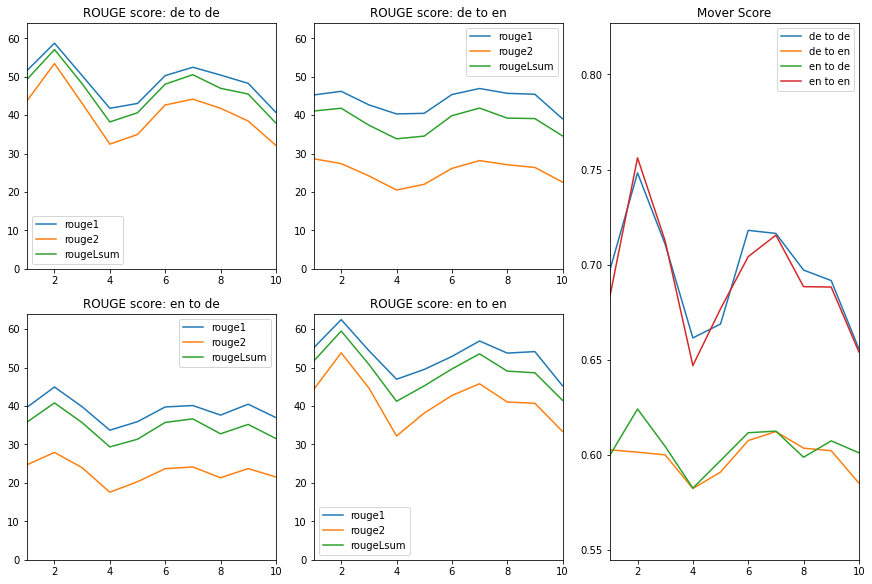

rouge_score max:  de to de [120 120 120]
rouge_score max:  de to en [120 120 120]
rouge_score max:  en to de [120 120 120]
rouge_score max:  en to en [120 120 120]


In [32]:
my_score = MyScore()
for i, (rouge_score, mover_score) in enumerate(scores):
    for token in language_token_order:
        print("[{}]----- {} -----".format(i, token))
        rouge_scores = rouge_score[token].result()
        mover_scores = mover_score[token].result()
        my_score(token, rouge_scores, mover_scores)

    
my_score.plot()

## Load Model with best rouge score

In [11]:
model = model_loader.load_epoch(10)
result_full_ds_path = result_folder + "t5_sum_sued"

In [12]:
summary_gen = SummaryGenerator(tokenizer, language_token_order, True)

In [13]:
predictions = summary_gen.generate_summaries(model, test_dataset_sued, result_full_ds_path, use_break_point=False)

570
[580]: time generating 10 batches: 295.46660232543945
[590]: time generating 10 batches: 287.91436791419983
[600]: time generating 10 batches: 286.32479429244995
[610]: time generating 10 batches: 290.93562746047974
[620]: time generating 10 batches: 294.50295400619507
[630]: time generating 10 batches: 297.82299041748047
[640]: time generating 10 batches: 305.344557762146
[650]: time generating 10 batches: 291.55412578582764
[660]: time generating 10 batches: 297.77154874801636
[670]: time generating 10 batches: 284.34508180618286
[680]: time generating 10 batches: 308.25627756118774
[690]: time generating 10 batches: 314.9212028980255
[700]: time generating 10 batches: 281.13191413879395
[710]: time generating 10 batches: 314.033545255661
[720]: time generating 10 batches: 305.5942225456238
[730]: time generating 10 batches: 288.13705134391785
[740]: time generating 10 batches: 283.27084708213806
[750]: time generating 10 batches: 294.60664439201355
[760]: time generating 10 batc

In [14]:
result_full_ds_path = result_folder + "t5_sum_cdm"

In [15]:
summary_gen = SummaryGenerator(tokenizer, language_token_order, True)

In [16]:
predictions = summary_gen.generate_summaries(model, test_dataset_cdm, result_full_ds_path, use_break_point=False)

[10]: time generating 10 batches: 539.646888256073
[20]: time generating 10 batches: 473.5952413082123
[30]: time generating 10 batches: 482.07154059410095
[40]: time generating 10 batches: 467.5983729362488
[50]: time generating 10 batches: 499.5985150337219
[60]: time generating 10 batches: 489.7042553424835
[70]: time generating 10 batches: 465.55009961128235
[80]: time generating 10 batches: 478.791223526001
[90]: time generating 10 batches: 489.8953423500061
[100]: time generating 10 batches: 476.3596999645233
[110]: time generating 10 batches: 474.88039112091064
[120]: time generating 10 batches: 489.3858251571655
[130]: time generating 10 batches: 453.8083927631378
[140]: time generating 10 batches: 483.57734417915344
[150]: time generating 10 batches: 497.25979232788086
[160]: time generating 10 batches: 470.12877130508423
[170]: time generating 10 batches: 477.2956233024597
[180]: time generating 10 batches: 465.4206430912018
[190]: time generating 10 batches: 481.199723720550

## Load data and show result table

In [14]:
result_full_ds_path = result_folder + "t5_sum_sued/"
mover_score = MoverScore()
predictions_dict = {}
predictions = []

epoch_files = listdir(result_full_ds_path)
epoch_files.sort()
for i, file_name in enumerate(epoch_files):
    with open(result_full_ds_path + file_name, "rb") as file:
        [predictions.append(item) for item in pickle.load(file)]
        
predictions_dict[0] = predictions

In [15]:
scores = get_scores(predictions_dict, 16)

Epoch: 0 done


In [16]:
my_score = MyScore()
for i, (rouge_score, mover_score) in enumerate(scores):
    for token in language_token_order:
        print("[{}]----- {} -----".format(i, token))
        my_score(token, rouge_score[token].result(), mover_score[token].result())

[0]----- de_de -----
rouge1 = 44.52, 95% confidence [43.81, 45.22]
rouge2 = 34.83, 95% confidence [33.95, 35.65]
rougeLsum = 41.30, 95% confidence [40.55, 42.06]
Moverscore: 0.67
[0]----- en_de -----
rouge1 = 36.62, 95% confidence [36.11, 37.18]
rouge2 = 20.94, 95% confidence [20.47, 21.41]
rougeLsum = 32.17, 95% confidence [31.66, 32.66]
Moverscore: 0.60
[0]----- de_en -----
rouge1 = 41.45, 95% confidence [40.96, 42.01]
rouge2 = 23.01, 95% confidence [22.54, 23.51]
rougeLsum = 35.77, 95% confidence [35.29, 36.26]
Moverscore: 0.59
[0]----- en_en -----
rouge1 = 48.48, 95% confidence [47.87, 49.08]
rouge2 = 35.71, 95% confidence [34.93, 36.52]
rougeLsum = 43.87, 95% confidence [43.22, 44.55]
Moverscore: 0.67


In [17]:
print(my_score.get_latex_table("Result scores of the 11th epoch test data from the SUM dataset.", "final_results_suedd_sum"))

0.6724999098399249
[44.52424005 34.83259928 41.29708622]
[44.52424005 34.83259928 41.29708622] [36.62188851 20.94383309 32.17211527]
[0.82251575 0.60127104 0.7790408 ]
[48.48133664 35.70632347 43.873437  ] [41.45259588 23.01349096 35.77404373]
[0.85502172 0.64452144 0.81539187]
{'Scores': ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'MoverScore'], 'German to German': [44.52424004509502, 34.83259927708162, 41.29708622391275, 0.6724999098399249], 'English to English': [48.48133664487195, 35.7063234737434, 43.87343699720452, 0.6660348425533932], 'English to German': ['36.62 (0.82)', '20.94 (0.60)', '32.17 (0.78)', 0.5985071041868621], 'German to English': ['41.45 (0.86)', '23.01 (0.64)', '35.77 (0.82)', 0.5924244870367398]}
\begin{table}[htb]
	\begin{center}
		\begin{tabular}{|l|l|l|l|l|}
			\hline
			Scores & German to German & English to English & English to German & German to English\\
			\hline\hline
			ROUGE-1 & 44.52 & 48.48 & 36.62 (0.82) & 41.45 (0.86)\\
			ROUGE-2 & 34.83 & 35.71 & 20.94 (0

In [18]:
result_full_ds_path = result_folder + "t5_sum_cdm/"
mover_score = MoverScore()
predictions_dict = {}
predictions = []

epoch_files = listdir(result_full_ds_path)
epoch_files.sort()
for i, file_name in enumerate(epoch_files):
    with open(result_full_ds_path + file_name, "rb") as file:
        [predictions.append(item) for item in pickle.load(file)]
        
predictions_dict[0] = predictions

In [19]:
scores = get_scores(predictions_dict, 16)

Epoch: 0 done


In [20]:
my_score = MyScore()
for i, (rouge_score, mover_score) in enumerate(scores):
    for token in language_token_order:
        print("[{}]----- {} -----".format(i, token))
        my_score(token, rouge_score[token].result(), mover_score[token].result())

[0]----- de_de -----
rouge1 = 34.25, 95% confidence [34.02, 34.50]
rouge2 = 15.36, 95% confidence [15.13, 15.58]
rougeLsum = 24.60, 95% confidence [24.36, 24.82]
Moverscore: 0.56
[0]----- en_de -----
rouge1 = 33.96, 95% confidence [33.73, 34.19]
rouge2 = 14.58, 95% confidence [14.39, 14.77]
rougeLsum = 24.53, 95% confidence [24.32, 24.72]
Moverscore: 0.56
[0]----- de_en -----
rouge1 = 37.46, 95% confidence [37.24, 37.67]
rouge2 = 15.02, 95% confidence [14.84, 15.20]
rougeLsum = 34.79, 95% confidence [34.59, 35.00]
Moverscore: 0.56
[0]----- en_en -----
rouge1 = 41.11, 95% confidence [40.86, 41.35]
rouge2 = 19.76, 95% confidence [19.50, 20.03]
rougeLsum = 38.37, 95% confidence [38.12, 38.61]
Moverscore: 0.57


In [21]:
print(my_score.get_latex_table("Result scores of the 11th epoch test data from the SUM dataset.", "final_results_cdm_sum"))

0.5632924257577
[34.2488049  15.35786327 24.59834658]
[34.2488049  15.35786327 24.59834658] [33.9563109  14.58189286 24.52564701]
[0.99145973 0.94947406 0.99704453]
[41.10602868 19.76385124 38.37072295] [37.4553436  15.01585946 34.79358011]
[0.91118857 0.75976384 0.90677416]
{'Scores': ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'MoverScore'], 'German to German': [34.248804895831405, 15.357863267584731, 24.598346575377626, 0.5632924257577], 'English to English': [41.10602868202713, 19.763851244227205, 38.37072295270234, 0.5677628382069705], 'English to German': ['33.96 (0.99)', '14.58 (0.95)', '24.53 (1.00)', 0.5632312307723898], 'German to English': ['37.46 (0.91)', '15.02 (0.76)', '34.79 (0.91)', 0.5595649076187424]}
\begin{table}[htb]
	\begin{center}
		\begin{tabular}{|l|l|l|l|l|}
			\hline
			Scores & German to German & English to English & English to German & German to English\\
			\hline\hline
			ROUGE-1 & 34.25 & 41.11 & 33.96 (0.99) & 37.46 (0.91)\\
			ROUGE-2 & 15.36 & 19.76 & 14.58 (0.